In [1]:
import jieba
import os
import pandas as pd
from PIL import Image

In [15]:
save_path_pos="./ChnSentiCorp情感分析酒店评论/正面/"
file_list_pos = os.listdir(save_path_pos)    # 所有正面评论的txt文件
file_name_pos = file_list[0]             # 以第一个txt文件为例
print(len(file_list))#共2000条正面评论

2000


In [19]:
pos=[]
for file_name_pos in file_list_pos:
    pos_path = os.path.join(save_path_pos,file_name_pos)    # 生成正面评论的完整路径
    posi = open(pos_path).read()             # 读取网页源码
    pos.append(posi)
print(pos[:10])
len(pos)

['地理位置不错、停车场很大。\n\n客服专业、房间也很标准。\n\n宽带流畅。\n\n免费注册 网站导航 宾馆索引 服务说明 关于携程 诚聘英才 代理合作 广告业务 联系我们\n\nCopyright', '确实是山上最好的酒店，环境和设施都很不错。我们这次住的是曙光别墅7201房，其他的别墅是竹木屋联排的，一排四间，我们这间是单独的且是水泥的，所以比较隔音，别墅区有3间这样的房间。设施齐全，有电吹风，水热也蛮大，没有空调，但山上晚上只有18度，用不上空调。我们上黄山是奥运前2天，天很好，所以房间还比较干燥，浴室有些潮，有2件羽绒服和加盖的被子。饭没有在宾馆吃，无法评价。服务还不错，动作挺快。\n\n\n\n', '酒店服务员真好，我被大雨截在长途车站，给酒店电话之后派车接了我。\n\n房间不敢恭维，太旧了，而且有味道。\n\n总体而言服务还可以。\n\n\n\n', '服务生很周到，携程和酒店的合作应该很好，有水果送，又可以免费洗烫2件衣服，而且速度很快，我们去的时候有人开会，估计占了很多房间，没有相应的房间了，酒店免费给我们升级，入住商务房。\n\n不过酒店有点旧了，该翻新一下了。还有就是周围没什么商场，晚上吃完饭想下去走走，周围全是卖烟酒的，难怪郑州空气那么差……\n\n其余都很好。相当满意。\n\n\n\n', '本来整体感觉不错,虽然价位比较高.我在入住的第二天晚上,室内温度上升到26度,问酒店的服务中心,她们说由于外面的天气比较冷(14-17度左右),现在空调只是有自然风~~~我说,外面是冷,但室内在没有窗户的情况下室温那么高,怎么睡?!最后得来的答案是酒店方面是不肯开冷空调的了,就拿了一把风扇给我!!!一家国际五星饭店居然用这种方法来处理,实在失望.除此之外,所有服务都是水准以内的.所以,以后大家去住就要选在正夏天或正冬天,否则没有空调.\n\n\n\n', '豪华商务房,面积非常大,但颇有大而无当之感,酒店的地毯很脏,污渍随处可见,空气里面有挥之不去的酒气. 建议携程考察一步之遥的华阳酒店,不少当地的朋友都推荐我们入住华阳.\n\n\n\n', '酒店位置很好，就在市中心广场边上，出行非常方便，房间条件也不错，下次应该还会入住。\n\n\n\n', '饭店的前台非常服务周到、快速有效率，服务态度也好，有五星级水准！在这要表扬一下！\n\n\n\n'

2000

In [17]:
save_path_neg="./ChnSentiCorp情感分析酒店评论/负面/"
file_list_neg = os.listdir(save_path_neg)    # 所有负面评论的txt文件
file_name = file_list[0]             # 以第一个txt文件为例
print(len(file_list_neg))#共2000条负面评论

2000


In [18]:
neg=[]
for file_name_neg in file_list_neg:
    neg_path = os.path.join(save_path_neg,file_name_neg)    # 生成正面评论的完整路径
    negi = open(neg_path).read()             # 读取网页源码
    neg.append(posi)
print(neg[:10])
len(neg)

['首先感觉不像大酒店,应该属于公寓式酒店,房间很小,明显是住宅公寓改装的.\n\n其次门童的服务不好,傻站在那里,我进去朝我傻傻的看着,既不问好,也不微笑,还不如放个像机场一样的假人算了,第一印象差.当然前台的服务也很一般,说是从什么日记本,但不是我主动打电话讨要的话根本没人送来.\n\n如果说300多块的房价我就不说什么了,但600的房价确实让我感觉太不值了.\n\n补充点评 2008年1月16日 ： 补充一点:附件的交通也不方便,说道这里我要批评携程,描述这个酒店在八佰伴附近,去查查词典看看什么叫"附近"\n\n宾馆反馈 2008年1月18日 ： 感谢您对酒店提出的善意的批评。酒店对相关部门的经理及员工进行了批评与处理，并从工作流程上进行了重新调整，尽量杜绝漏发礼品情况的发生。真心地希望客人能再次入住，对酒店的服务进行监督，以便酒店的服务能更趋完善。\n\n\n\n\n\n\n\n', '首先感觉不像大酒店,应该属于公寓式酒店,房间很小,明显是住宅公寓改装的.\n\n其次门童的服务不好,傻站在那里,我进去朝我傻傻的看着,既不问好,也不微笑,还不如放个像机场一样的假人算了,第一印象差.当然前台的服务也很一般,说是从什么日记本,但不是我主动打电话讨要的话根本没人送来.\n\n如果说300多块的房价我就不说什么了,但600的房价确实让我感觉太不值了.\n\n补充点评 2008年1月16日 ： 补充一点:附件的交通也不方便,说道这里我要批评携程,描述这个酒店在八佰伴附近,去查查词典看看什么叫"附近"\n\n宾馆反馈 2008年1月18日 ： 感谢您对酒店提出的善意的批评。酒店对相关部门的经理及员工进行了批评与处理，并从工作流程上进行了重新调整，尽量杜绝漏发礼品情况的发生。真心地希望客人能再次入住，对酒店的服务进行监督，以便酒店的服务能更趋完善。\n\n\n\n\n\n\n\n', '首先感觉不像大酒店,应该属于公寓式酒店,房间很小,明显是住宅公寓改装的.\n\n其次门童的服务不好,傻站在那里,我进去朝我傻傻的看着,既不问好,也不微笑,还不如放个像机场一样的假人算了,第一印象差.当然前台的服务也很一般,说是从什么日记本,但不是我主动打电话讨要的话根本没人送来.\n\n如果说300多块的房价我就不说什么了,但600的房价确实让我感觉太不值了.\n\n补充点评 2008年1

2000

In [106]:
y_pos=[1]*2000#生成数据框
y_neg=[0]*2000
data1=pd.DataFrame({"评论":pos,
                              "情感":y_pos})
data2=pd.DataFrame({"评论":neg,
                              "情感":y_neg})
data=data1.append(data2,ignore_index=True)
print(data.head())

data.shape

                                                  评论  情感
0  地理位置不错、停车场很大。\n\n客服专业、房间也很标准。\n\n宽带流畅。\n\n免费注册...   1
1  确实是山上最好的酒店，环境和设施都很不错。我们这次住的是曙光别墅7201房，其他的别墅是竹木...   1
2  酒店服务员真好，我被大雨截在长途车站，给酒店电话之后派车接了我。\n\n房间不敢恭维，太旧了...   1
3  服务生很周到，携程和酒店的合作应该很好，有水果送，又可以免费洗烫2件衣服，而且速度很快，我们...   1
4  本来整体感觉不错,虽然价位比较高.我在入住的第二天晚上,室内温度上升到26度,问酒店的服务中...   1


(4000, 2)

In [107]:
import numpy as np
data=data.reindex(np.random.permutation(data.index))
data=data.reset_index(drop=True)
data.to_excel("数据.xlsx",encoding="utf8")
data.head()

,评论,情感
0,"首先感觉不像大酒店,应该属于公寓式酒店,房间很小,明显是住宅公寓改装的.\n\n其次门童的服...",0
1,服务很好。24小时供餐。我们晚上10点到酒店，专门为我们提供晚餐，很是感动，且价格也比较实惠...,1
2,标准间环境不怎么的，楼层低、有蚊子。商务间还可以，大床房1\n\n\n\n,1
3,"首先感觉不像大酒店,应该属于公寓式酒店,房间很小,明显是住宅公寓改装的.\n\n其次门童的服...",0
4,酒店的基本设施一般，但服务态度确实很不错，房间8楼以下就是新装修的，8楼的房间就比较成旧，洗...,1


In [101]:
stopwords_file = "stopwords.txt"#引入停用词
with open(os.path.join(stopwords_file), "r", encoding="utf8") as f:
    stopwords_list = [word.strip() for word in f.read()]
stopwords_list
re=data["评论"]
re=re.values
re[:2]
stopwords_list

['—',
 '—',
 '—',
 '',
 '》',
 '）',
 '，',
 '',
 '）',
 '÷',
 '（',
 '１',
 '－',
 '',
 '”',
 '，',
 '',
 '）',
 '、',
 '',
 '＝',
 '（',
 '',
 ':',
 '',
 '→',
 '',
 '℃',
 '',
 '&',
 '',
 '*',
 '',
 '一',
 '一',
 '',
 '~',
 '~',
 '~',
 '~',
 '',
 '’',
 '',
 '.',
 '',
 '『',
 '',
 '.',
 '一',
 '',
 '.',
 '/',
 '',
 '-',
 '-',
 '',
 '』',
 '',
 '＝',
 '″',
 '',
 '【',
 '',
 '［',
 '＊',
 '］',
 '',
 '｝',
 '＞',
 '',
 '［',
 '⑤',
 '］',
 '］',
 '',
 '［',
 '①',
 'Ｄ',
 '］',
 '',
 'ｃ',
 '］',
 '',
 'ｎ',
 'ｇ',
 '昉',
 '',
 '＊',
 '',
 '/',
 '/',
 '',
 '［',
 '',
 '］',
 '',
 '［',
 '②',
 'ｅ',
 '］',
 '',
 '［',
 '②',
 'ｇ',
 '］',
 '',
 '＝',
 '｛',
 '',
 '}',
 '',
 '，',
 '也',
 '',
 '‘',
 '',
 'Ａ',
 '',
 '［',
 '①',
 '⑥',
 '］',
 '',
 '［',
 '②',
 'Ｂ',
 '］',
 '',
 '［',
 '①',
 'ａ',
 '］',
 '',
 '［',
 '④',
 'ａ',
 '］',
 '',
 '［',
 '①',
 '③',
 '］',
 '',
 '［',
 '③',
 'ｈ',
 '］',
 '',
 '③',
 '］',
 '',
 '１',
 '．',
 '',
 '－',
 '－',
 '',
 '［',
 '②',
 'ｂ',
 '］',
 '',
 '’',
 '‘',
 '',
 '×',
 '×',
 '×',
 '',
 '［',
 '①',
 '⑧',
 '］',
 '',
 '０',
 '

In [102]:
seg_res = jieba.lcut(re[1])
seg_res_clean = []
for word in seg_res:
    if word not in stop_words:
        seg_res_clean.append(word)
seg_res_clean

['酒店',
 '不算',
 '是',
 '最新',
 '的',
 '但是',
 '房间',
 '和',
 '服务',
 '都',
 '很',
 '不错',
 '因为',
 '地理位置',
 '原因',
 '打',
 '的',
 '不如',
 '临街',
 '的',
 '酒店',
 '那么',
 '方便',
 '酒店',
 '服务员',
 '和',
 '门童',
 '都',
 '很',
 '热情',
 '细致',
 '周到',
 '地为',
 '客户',
 '介绍',
 '最合适',
 '的',
 '出行',
 '方式',
 '和',
 '线路',
 '感觉',
 '很',
 '好']

In [103]:
seg_res_list = [ jieba.lcut(item) for item in re ]
seg_res_clean = []
for seg in seg_res_list:
     if word not in stop_words:
        seg_res_clean.append(word)

In [97]:
from nltk.probability import FreqDist
word_freq = FreqDist(seg_res_clean)
#most_common_word=word_freq.most_common(1000)
#most_common_word

[('首先 感觉 不像 大酒店 应该 属于 公寓式 酒店 房间 很小 明显 是 住宅 公寓 改装 的 其次 门童 的 服务 不好 傻站 在 那里 我 进去 朝 我 傻傻的 看着 既 不 问好 也 不 微笑 还 不如 放个 像 机场 一样 的 假人 算了 第一印象 差 当然 前台 的 服务 也 很 一般 说 是从 什么 日记本 但 不是 我 主动 打电话 讨要 的话 根本 没 人 送来 如果说 300 多块 的 房价 我 就 不 说 什么 了 但 600 的 房价 确实 让 我 感觉 太 不值 了 补充 点评 2008 年 月 16 日 补充 一点 : 附件 的 交通 也 不 方便 说道 这里 我要 批评 携程 描述 这个 酒店 在 八佰伴 附近 去 查查 词典 看看 什么 叫 附近 宾馆 反馈 2008 年 月 18 日 感谢您 对 酒店 提出 的 善意 的 批评 酒店 对 相关 部门 的 经理 及 员工 进行 了 批评 与 处理 并 从 工作 流程 上 进行 了 重新 调整 尽量 杜绝 漏发 礼品 情况 的 发生 真心 地 希望 客人 能 再次 入住 对 酒店 的 服务 进行 监督 以便 酒店 的 服务 能 更趋 完善',
  2000),
 ('还 不错 的 酒店 地点 很 好 就 在 火车站 出来 一楼 有点 吵 有 旅行团 也 有 来 吃饭 的 客人 不过 不 影响 住宿', 4),
 ('房间 还是 比较 舒适 的 酒店 服务 良好 大厅 明亮 整洁', 3),
 ('酒店 离 市区 比较 远 不过 在 尖 沙嘴 一个 小时 有 一 班车 去 酒店 房间内 设施 比较 陈旧 些 但是 外部环境 非常 好 空气 也 很 好 出 酒店 不远处 就 有 沙滩 非常适合 去 渡假 早餐 的 品种 也 比较 丰富 下次 去 还 会 去 住 那里 的 环境 真的 非常 好 比如 心 酒店 好多 了',
  2),
 ('因为 之前 查看 了 携程 的 点评 所以 对 这家 酒店 的 期望值 并 不 高 但 入住 以后 总体 来说 感觉 还 可以 虽说 照 五星级 还有 差距 但 在 吉林 应该 可以 接受 酒店 周围 好像 没什么 合适 的 饭店 最后 还是 在 酒店 吃 了 巴西 烤肉 自助 比 其他 地方 贵些 88 元 位 水平 一般 还有 一个 就是 卫生间 

In [80]:
cloud_mask = np.array(Image.open("火锅图片.png"))
import matplotlib.pyplot as plt
def wordcloudplot(freq_dict):
    wordcloud = WordCloud(font_path='/Library/Fonts/Microsoft/Kaiti.ttf',
                          background_color="white",   #可以选择black或white
                          margin=5, width=1800, height=800, # 长宽度控制清晰程度
                          mask=cloud_mask ,
                          contour_width=3,
                          contour_color='steelblue')
    wordcloud = wordcloud.generate_from_frequencies(freq_dict)
    # Open a plot of the generated image
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig('wordcloud.png', dpi=300, bbox_inches='tight')
    plt.show()
    

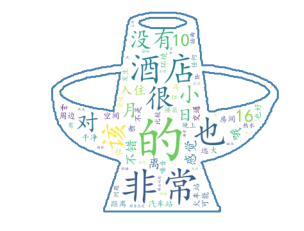

In [81]:
from wordcloud import WordCloud
wordcloudplot(word_freq)

In [2]:
#用word2vec做词向量
data=pd.read_excel("数据.xlsx")
data.head()

,Unnamed: 0,评论,情感
0,0,"首先感觉不像大酒店,应该属于公寓式酒店,房间很小,明显是住宅公寓改装的.\n\n其次门童的服...",0
1,1,服务很好。24小时供餐。我们晚上10点到酒店，专门为我们提供晚餐，很是感动，且价格也比较实惠...,1
2,2,标准间环境不怎么的，楼层低、有蚊子。商务间还可以，大床房1\n\n\n\n,1
3,3,"首先感觉不像大酒店,应该属于公寓式酒店,房间很小,明显是住宅公寓改装的.\n\n其次门童的服...",0
4,4,酒店的基本设施一般，但服务态度确实很不错，房间8楼以下就是新装修的，8楼的房间就比较成旧，洗...,1


In [7]:
values=data["评论"].values
values[:2]

array(['首先感觉不像大酒店,应该属于公寓式酒店,房间很小,明显是住宅公寓改装的.\n\n其次门童的服务不好,傻站在那里,我进去朝我傻傻的看着,既不问好,也不微笑,还不如放个像机场一样的假人算了,第一印象差.当然前台的服务也很一般,说是从什么日记本,但不是我主动打电话讨要的话根本没人送来.\n\n如果说300多块的房价我就不说什么了,但600的房价确实让我感觉太不值了.\n\n补充点评 2008年1月16日 ： 补充一点:附件的交通也不方便,说道这里我要批评携程,描述这个酒店在八佰伴附近,去查查词典看看什么叫"附近"\n\n宾馆反馈 2008年1月18日 ： 感谢您对酒店提出的善意的批评。酒店对相关部门的经理及员工进行了批评与处理，并从工作流程上进行了重新调整，尽量杜绝漏发礼品情况的发生。真心地希望客人能再次入住，对酒店的服务进行监督，以便酒店的服务能更趋完善。\n\n\n\n\n\n\n\n',
       '服务很好。24小时供餐。我们晚上10点到酒店，专门为我们提供晚餐，很是感动，且价格也比较实惠。唯一感到不足的是，1号楼与2号楼的入住手续是分别办的，我们先开车找到酒店大堂，被告知这是2号楼，要到1号楼办手续。但携程订房时并未告知是几号楼。\n\n\n\n'],
      dtype=object)

In [50]:
stopwords_file = "stopwords.txt"#引入停用词
with open(os.path.join(stopwords_file), "r", encoding="utf8") as f:
    stopwords_list = [word.strip() for word in f.read()]
seg_res_list = [ jieba.lcut(item) for item in values ]
seg_res_clean = []
for seg in seg_res_list:
    for word in seg:
        if word not in  stopwords_list:
            seg_res_clean.append(word)

In [57]:
from nltk.probability import FreqDist
word_freq = FreqDist(seg_res_clean)
most_common_word=word_freq.most_common(1000)
most_common_word=zip(*most_common_word)

In [43]:
import numpy as np
cloud_mask = np.array(Image.open("火锅图片.png"))
import matplotlib.pyplot as plt
def wordcloudplot(freq_dict):
    wordcloud = WordCloud(font_path='/Library/Fonts/Microsoft/Kaiti.ttf',
                          background_color="white",   #可以选择black或white
                          margin=5, width=1800, height=800, # 长宽度控制清晰程度
                          mask=cloud_mask ,
                          contour_width=3,
                          contour_color='steelblue')
    wordcloud = wordcloud.generate_from_frequencies(freq_dict)
    # Open a plot of the generated image
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig('wordcloud.png', dpi=300, bbox_inches='tight')
    plt.show()

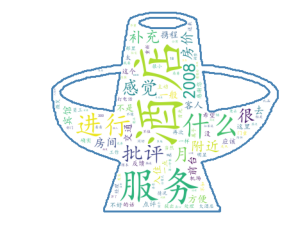

In [66]:
from wordcloud import WordCloud
wordcloudplot(word_freq)

In [82]:
#转换词向量
from gensim.models import word2vec
model2=word2vec.Word2Vec(seg_res_list, 
                 vector_size=50, # 词向量的维度
                 workers=4)  # 调用的进程数，CPU
# 常用Word2Vec的参数：min_count,如果词频小于 min_count, word2vec 不会把这个词放入 vocab 里

# 保存模型
model2.save('imdb.d2v')

In [83]:
# 加载模型
model2 = word2vec.Word2Vec.load('imdb.d2v')

In [84]:
model2.wv["酒店"]

array([-1.9452657 ,  0.14837176, -2.2187474 , -0.65831435,  1.2298887 ,
        3.0937796 , -2.5068495 , -0.30328923,  3.2597547 ,  2.3857834 ,
       -1.0787852 , -0.99124444,  0.576937  ,  0.2633209 , -1.262375  ,
        1.6121489 , -1.2904397 ,  1.3457165 ,  0.6966832 ,  1.600474  ,
       -2.3375652 , -0.5151062 , -2.1563618 , -3.9515703 ,  2.7044408 ,
       -0.91238296,  2.8472664 , -1.879994  , -0.7233829 ,  3.0755622 ,
       -0.45831123, -0.77938145, -2.9323688 ,  2.4293182 , -0.5774683 ,
       -0.59671503, -1.1544162 , -2.6939867 , -2.6094055 , -1.2310572 ,
        0.06815569, -0.13165785,  0.4127834 ,  0.53206474, -1.2983347 ,
        0.35774595,  2.0156293 , -1.683671  , -4.774125  ,  0.6362713 ],
      dtype=float32)

In [85]:
from sklearn.model_selection import train_test_split
X = data['评论'].values
y = data['情感'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [93]:
# 用 word vec 的均值作为 doc vec
def get_doc_vec(sentence, model):
    scores = np.array([model2.wv["word"] for word in jieba.lcut(sentence) if word in model.wv if word in stopwords_list])
    return np.mean(scores, axis=0)

In [ ]:
import numpy as np
X_word2vec_train = np.array([get_doc_vec(sentence, model2) for sentence in X_train])
X_word2vec_test =  np.array([get_doc_vec(sentence, model2) for sentence in X_test])

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [88]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_word2vec_train,y_train)

ValueError: setting an array element with a sequence.

array(['首先感觉不像大酒店,应该属于公寓式酒店,房间很小,明显是住宅公寓改装的.\n\n其次门童的服务不好,傻站在那里,我进去朝我傻傻的看着,既不问好,也不微笑,还不如放个像机场一样的假人算了,第一印象差.当然前台的服务也很一般,说是从什么日记本,但不是我主动打电话讨要的话根本没人送来.\n\n如果说300多块的房价我就不说什么了,但600的房价确实让我感觉太不值了.\n\n补充点评 2008年1月16日 ： 补充一点:附件的交通也不方便,说道这里我要批评携程,描述这个酒店在八佰伴附近,去查查词典看看什么叫"附近"\n\n宾馆反馈 2008年1月18日 ： 感谢您对酒店提出的善意的批评。酒店对相关部门的经理及员工进行了批评与处理，并从工作流程上进行了重新调整，尽量杜绝漏发礼品情况的发生。真心地希望客人能再次入住，对酒店的服务进行监督，以便酒店的服务能更趋完善。\n\n\n\n\n\n\n\n',
       '服务很好。24小时供餐。我们晚上10点到酒店，专门为我们提供晚餐，很是感动，且价格也比较实惠。唯一感到不足的是，1号楼与2号楼的入住手续是分别办的，我们先开车找到酒店大堂，被告知这是2号楼，要到1号楼办手续。但携程订房时并未告知是几号楼。\n\n\n\n',
       '标准间环境不怎么的，楼层低、有蚊子。商务间还可以，大床房1\n\n\n\n', ...,
       '首先感觉不像大酒店,应该属于公寓式酒店,房间很小,明显是住宅公寓改装的.\n\n其次门童的服务不好,傻站在那里,我进去朝我傻傻的看着,既不问好,也不微笑,还不如放个像机场一样的假人算了,第一印象差.当然前台的服务也很一般,说是从什么日记本,但不是我主动打电话讨要的话根本没人送来.\n\n如果说300多块的房价我就不说什么了,但600的房价确实让我感觉太不值了.\n\n补充点评 2008年1月16日 ： 补充一点:附件的交通也不方便,说道这里我要批评携程,描述这个酒店在八佰伴附近,去查查词典看看什么叫"附近"\n\n宾馆反馈 2008年1月18日 ： 感谢您对酒店提出的善意的批评。酒店对相关部门的经理及员工进行了批评与处理，并从工作流程上进行了重新调整，尽量杜绝漏发礼品情况的发生。真心地希望客人能再次入住，对酒店的服务进行监督，以便酒店的服务能更趋完善。\n\n\n\n\n\n

In [80]:
seg_res_clean[:2]

['首先', '感觉']